# Flexible Image Transport System (FITS) Data Analysis

In [68]:
!pip install astroquery

In [69]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astroquery.skyview import SkyView

In [70]:
# Getting Andromeda data (M31) from SDSSg Survey using SkyView
# Getting Eagle Nebula and
# Primary hdu with metadata and data
hdu = SkyView.get_images("M31", "SDSSg")[0][0]
eagle_hdu = SkyView.get_images("Eagle Nebula", "DSS2 IR", pixels=600)[0][0]
ngc_4038_hdu = SkyView.get_images("NGC 4038", "DSS2 IR", pixels=600)[0][0]
m31_hdu = SkyView.get_images("M31", "DSS2 Blue", pixels=600, radius=150*u.arcmin)[0][0]

In [71]:
#Getting the Metadata from header
hdu.header

SIMPLE  =                    T / Written by SkyView Tue Jan 23 16:38:57 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [72]:
# Getting pixels data from hdu
hdu.data
M31_Pixels = hdu.data
M31_DSS2_Blue_Pixels = m31_hdu.data
Eagle_Pixels = eagle_hdu.data
NGC4038_Pixels = ngc_4038_hdu.data

In [73]:
# Check type of hud.data

type(M31_Pixels)

numpy.ndarray

In [74]:
# Check shape of hud.data
M31_Pixels.shape

(300, 300)

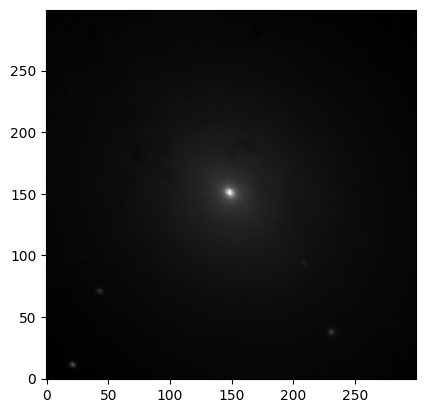

In [75]:
# Plot the image
# Default cmap is viridis
plt.imshow(M31_Pixels, cmap='gray', origin='lower')

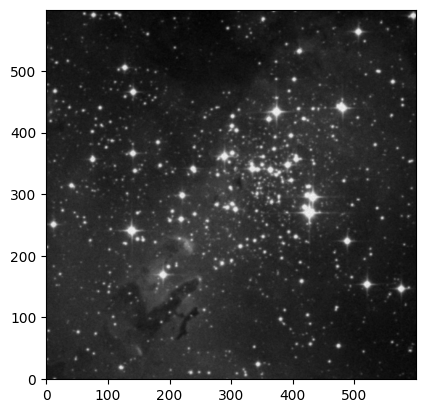

In [76]:
plt.imshow(Eagle_Pixels, cmap='gray', origin='lower')

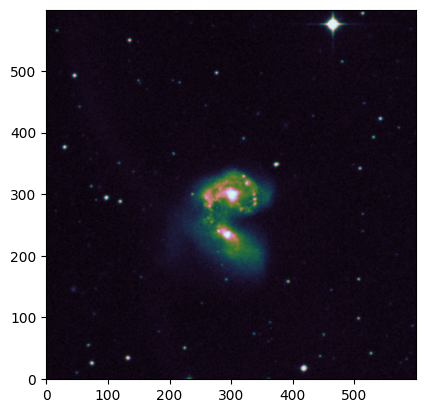

In [77]:
plt.imshow(NGC4038_Pixels, cmap='cubehelix', origin='lower')
#plt.colorbar()
plt.show()

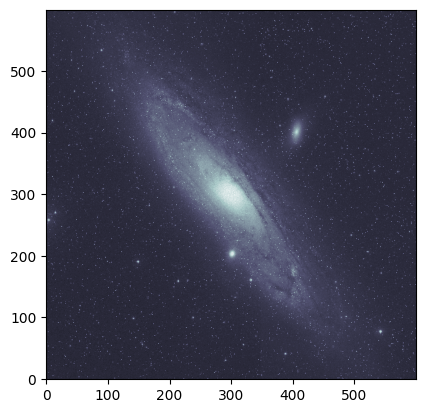

In [78]:
plt.imshow(M31_DSS2_Blue_Pixels, cmap='bone',origin='lower')

**Creating a FITS file**

In [79]:
# Importing fits from io module of astropy

from astropy.io import fits

In [81]:
# Steps for creating FITS file

# 1. Creating HDUList() to store different HDUs
hdulist = fits.HDUList()

# 2. Create PrimaryHDU()
hdu_31 = fits.PrimaryHDU()

# 3. Add Pixels data
hdu_31.data = M31_DSS2_Blue_Pixels

# 4. Add Meta data
hdu_31.header = m31_hdu.header

# 5. Append the primary HDU to the HDU list
hdulist.append(hdu_31)

# 6. Generating the FITS data
hdulist.writeto('Generated_FITS_file.fits')

In [82]:
#hdu_31.header

In [83]:
#hdu_31.data

In [84]:
# Open the generated FITS data
My_fits = fits.open('/content/Generated_FITS_file.fits')

In [85]:
# View contents of the generated My_fits

'''

My_fits
My_fits[0]
My_fits[0].header
My_fits[0].data

sample_data = My_fits[0].data
sample_data.shape
type(sample_data)

'''

'\n\nMy_fits\nMy_fits[0]\nMy_fits[0].header\nMy_fits[0].data\n\nsample_data = My_fits[0].data\nsample_data.shape\ntype(sample_data)\n \n'

# Pixel Scaling on M31 data

In [86]:
# Checking some statistics of data (min, max, mean, std)

print('Summary Statistics of M31 Pixels')
print(f'Minimum: {np.min(M31_Pixels)}')
print(f'Maximum: {np.max(M31_Pixels)}')
print(f'Average: {np.mean(M31_Pixels)}')
print(f'Standard Deviation: {np.std(M31_Pixels)}')

Summary Statistics of M31 Pixels
Minimum: 5.359375
Maximum: 178.0
Average: 13.329444885253906
Standard Deviation: 6.3922271728515625


In [87]:
# Pixel value at center of M31 galaxy
M31_Pixels[151][151]

126.5

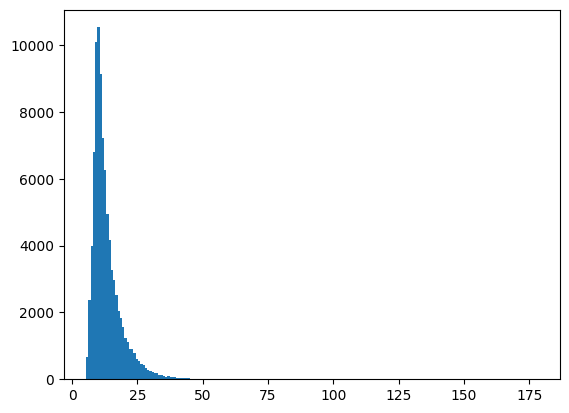

In [88]:
# Histogram distribution
plt.hist(M31_Pixels.flat, bins=200)
plt.show()

# MinMax Pixel Scaling


### Intensity Normalization or Linear Scaling or Min Max Scaling
x_scaled = (x - x_min) / (x_max - x_min)

In [89]:
# Function to plot the scaled pixel arrays

def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color,weight='bold')
  plt.axis('off')


In [90]:
# Compare original and minmax scaled
def compare_pixels(scaled_array, title):
  plt.subplot(1,2,1)
  plot_pixels(M31_Pixels, title='Original Image', color='black')
  plt.subplot(1,2,2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

In [91]:
# Function to normalize

def minmax_scaling(pixel_array):
  num = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return num/den

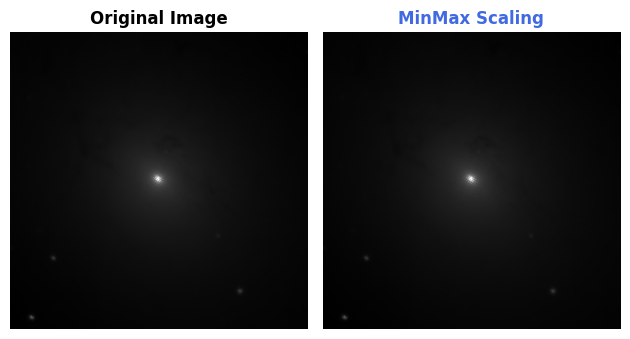

In [92]:
# Normalizing M31 data and visualizing it

minmax_array = minmax_scaling(M31_Pixels)
#plot_pixels(minmax_array, title='MinMax Scaling', color='royalblue')

compare_pixels(minmax_array, title='MinMax Scaling')

# Standardization/ Z Scaling

z = (x - μ) / σ

In [93]:
# Function to standardize

def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

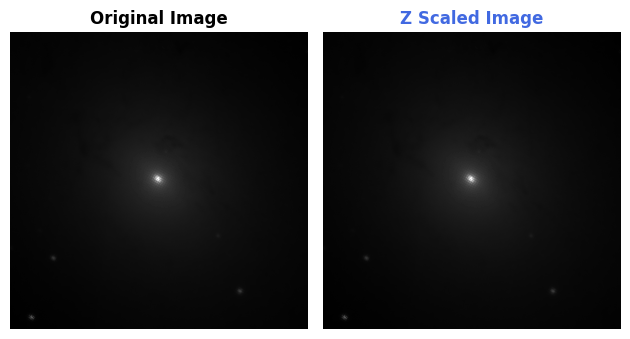

In [94]:
# Standardized M31 data

zscaled_array = zscale(M31_Pixels)
compare_pixels(zscaled_array, title='Z Scaled Image')

# Log Normalization

In [95]:
def log_normalization(pixel_array):
  return np.log(pixel_array)

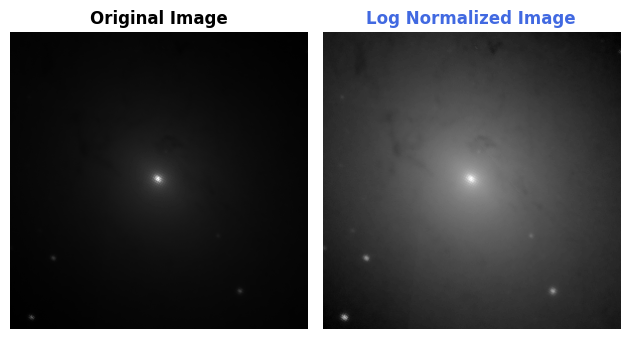

In [96]:
log_norm_array = log_normalization(M31_Pixels)
compare_pixels(log_norm_array, title='Log Normalized Image')

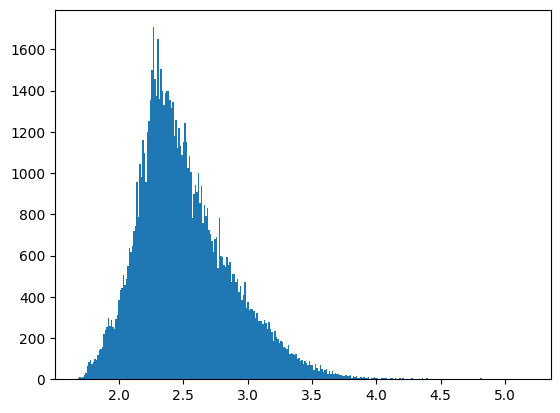

In [97]:
# Historgram distribution of log normalized array
plt.hist(log_norm_array.flat, bins=300)
plt.show()

In [98]:
def sqrt_scaling(pixel_array):
  return np.sqrt(pixel_array)

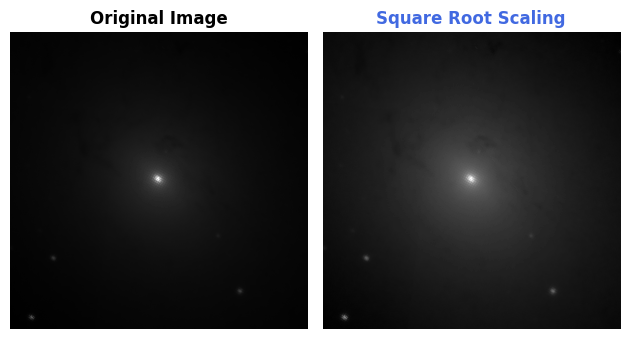

In [99]:
sqrt_array = sqrt_scaling(M31_Pixels)
compare_pixels(sqrt_array, title='Square Root Scaling')

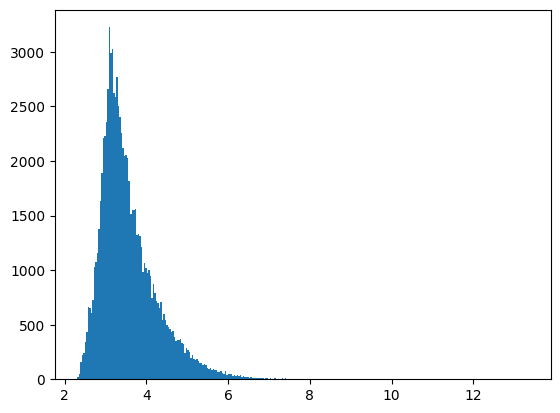

In [100]:
plt.hist(sqrt_array.flat, bins=300)
plt.show()

# ZScaleInterval

In [102]:
# Getting the ZScaleInterval from visualization module of astropy
from astropy.visualization import ZScaleInterval

In [103]:
# Object for ZScaleInterval
z = ZScaleInterval()

In [104]:
# Min and max values of the M31 data
zmin, zmax = z.get_limits(log_norm_array)

In [105]:
print(f'Minimum ={zmin}')
print(f'Maximum ={zmax}')

Minimum =1.6889997720718384
Maximum =4.447910199027213


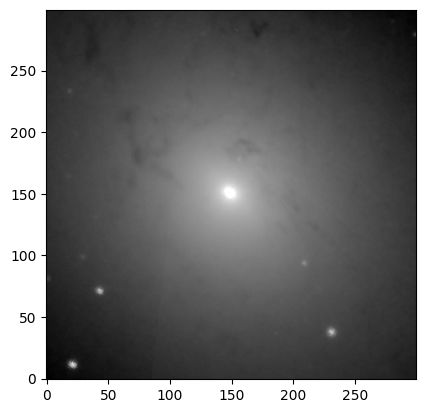

In [110]:
plt.imshow(log_norm_array, vmin=zmin, vmax=zmax, cmap='gray', origin='lower')
plt.show()

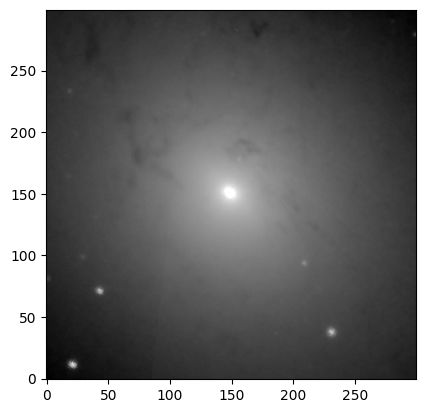

In [113]:
# Get the created array

img = plt.imshow(log_norm_array, vmin=zmin, vmax=zmax, cmap='gray', origin='lower')

In [116]:
# unsampled = True to keep the original dimensions of the image
image_array = img.make_image(renderer=None, unsampled=True)[0]

In [117]:
image_array.shape

# The 4 represents red, green, blue and alpha (opacity) channels, making up a 4 channel image

(300, 300, 4)

## 4 Channel Image to grayscale

In [120]:
# Import cv2 library

import cv2

In [121]:
# Convert 4 channel image ro grayscale image
# in cv2, 4 channel is in the format of BGRA - Blue, Green, Red and Alpha

gray_array = cv2.cvtColor(image_array,cv2.COLOR_BGRA2GRAY)

In [122]:
gray_array.shape

(300, 300)

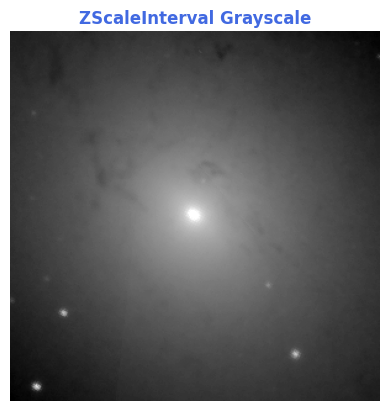

In [124]:
plot_pixels(gray_array, title='ZScaleInterval Grayscale', color='royalblue')

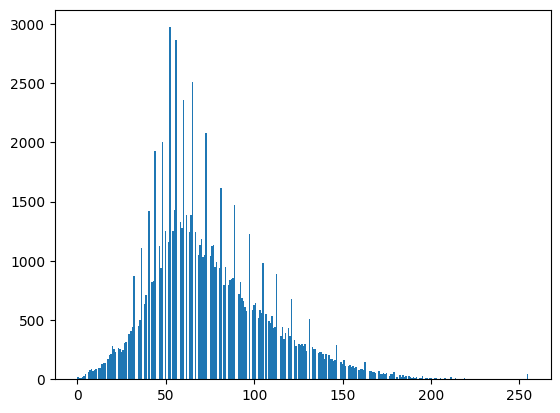

In [125]:
plt.hist(gray_array.flat, bins=300)
plt.show()

In [126]:
grayscale_zint_array = gray_array

# Denoising using Gaussian
 Blurring the image by removing noises, which is a prerequisite to many filters and this is known as Gaussian Smoothing

 It works on the principle of Convolution

In [127]:
#Convolution 2d filter from scipy's signal module

from scipy.signal import convolve2d

In [133]:
# Generate kernel/filter

kernel = np.ones((3,3))/9

In [134]:
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [135]:
# Creating a gaussian kernel

gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                           [1/8, 1/4, 1/8],
                           [1/16, 1/8, 1/16]])

In [138]:
# Convolution with kernel

convolved_image = convolve2d(M31_Pixels, kernel, mode='same')

In [139]:
# Convolution with gaussian kernel

gaussian_convolved_image = convolve2d(M31_Pixels, gaussian_kernel, mode='same')

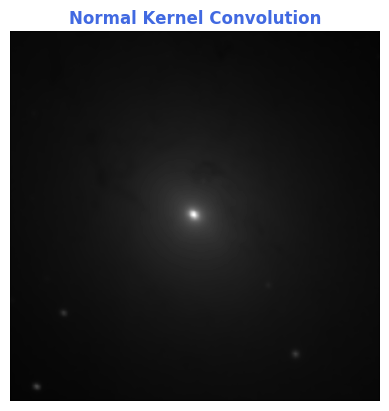

In [140]:
# Kernel convolved output
plot_pixels(convolved_image, title='Normal Kernel Convolution', color='royalblue')

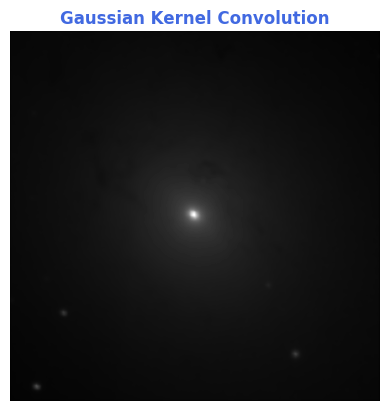

In [141]:
# Gausian kernel convolved output
plot_pixels(gaussian_convolved_image, title='Gaussian Kernel Convolution', color='royalblue')

In [142]:
# Convolution of grayscale M31 data with gaussian kernel
convolved_grayscale = convolve2d(grayscale_zint_array, gaussian_kernel, mode='same')

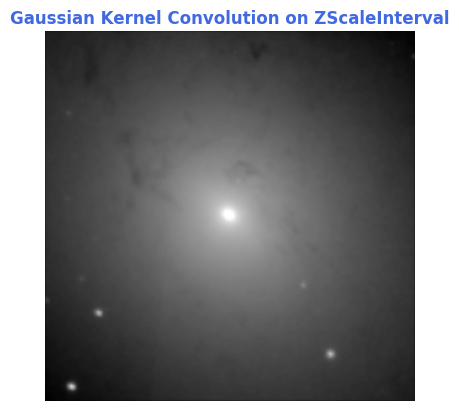

In [144]:
plot_pixels(convolved_grayscale, title='Gaussian Kernel Convolution on ZScaleInterval', color='royalblue')

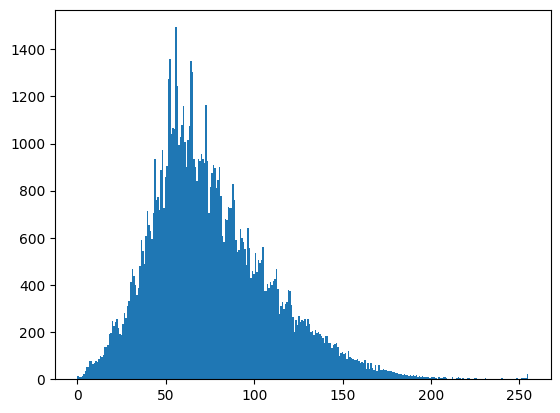

In [145]:
plt.hist(convolved_grayscale.flat, bins=300)
plt.show()

# Enhancing the Linear Features on M31 with Meijering Filter and Sato Filter

In [155]:
# Creating spectral list

SPECTRAL_LIST = ["gray", "jet", "hot", "prism", "nipy_spectral"]

In [148]:
# Import meijering and sato filters from skimage

from skimage.filters import meijering, sato

In [149]:
# Implementing these filters on the convolved image

meijering_output = meijering(convolved_grayscale)
sato_output = sato(convolved_grayscale)

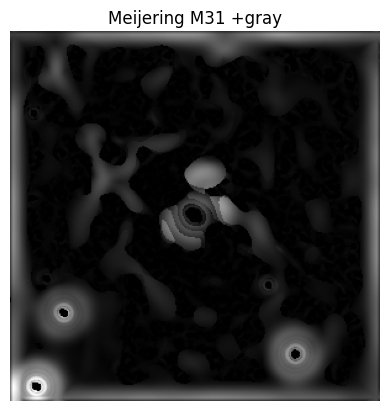

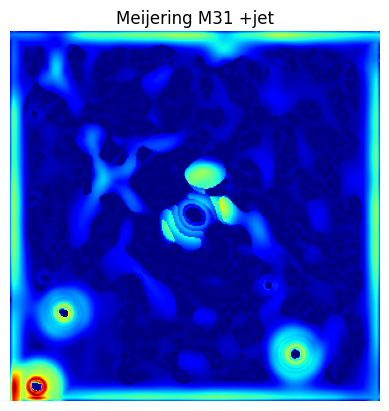

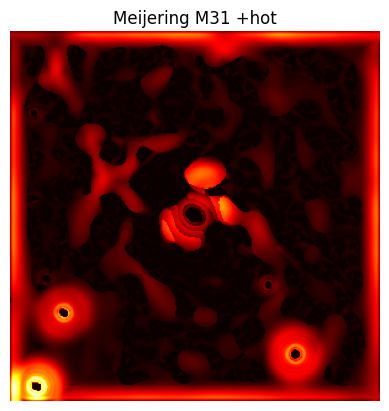

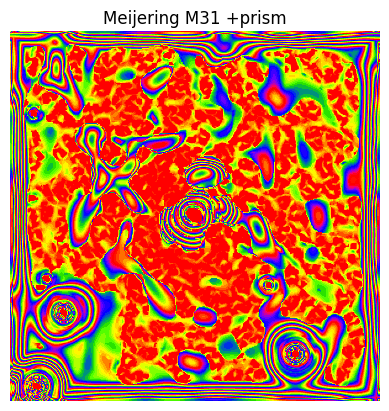

In [156]:
# Visualize the output of the meijering filter for elements in SPECTRAL_LIST
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap=colormap, origin='lower')
  plt.title(f'Meijering M31 +{colormap}')
  plt.axis('off')
  plt.show()

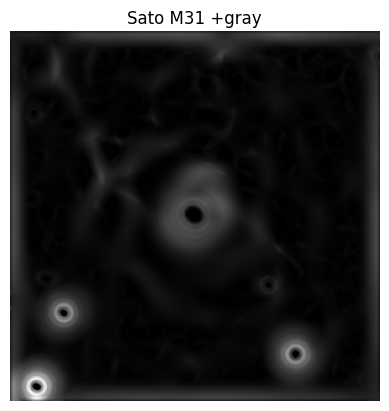

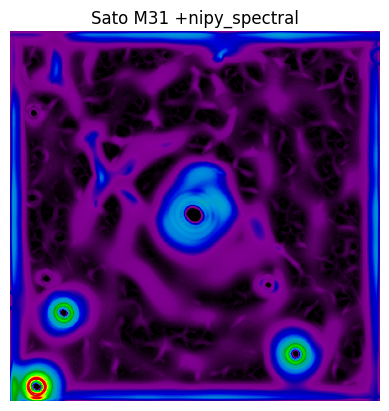

In [157]:
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap=colormap, origin='lower')
  plt.title(f'Sato M31 +{colormap}')
  plt.axis('off')
  plt.show()

# Feature Detection and Extraction with skimage feature

corner_foerstner - A fast operator for detection and precise location of distinct points, corners and centres of circular features

In [158]:
# Import feature module from skimage

from skimage.feature import corner_foerstner

In [159]:
# Normalized pixels/ standard scale pixes/ log_scaled pixels
feature_output = corner_foerstner(convolved_grayscale)

#Featured image output
feature_output[1]

array([[0.4989641 , 0.21946652, 0.20260812, ..., 0.24883013, 0.65938198,
        0.71467819],
       [0.39800763, 0.23215066, 0.14497339, ..., 0.54766745, 0.90813068,
        0.66235114],
       [0.24457695, 0.17733225, 0.10416085, ..., 0.98735337, 0.55825765,
        0.25356002],
       ...,
       [0.22429728, 0.51726484, 0.96709646, ..., 0.6867379 , 0.62290977,
        0.29146722],
       [0.64334682, 0.9009524 , 0.55832027, ..., 0.49465811, 0.75665701,
        0.5648419 ],
       [0.71794373, 0.66759447, 0.2532344 , ..., 0.24465286, 0.53700323,
        0.60483135]])

In [160]:
print(type(feature_output))
print(len(feature_output))

<class 'tuple'>
2


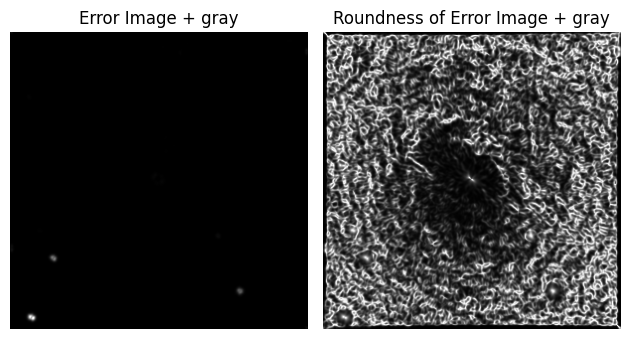

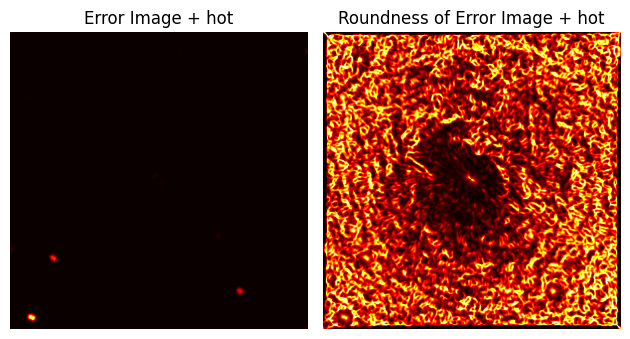

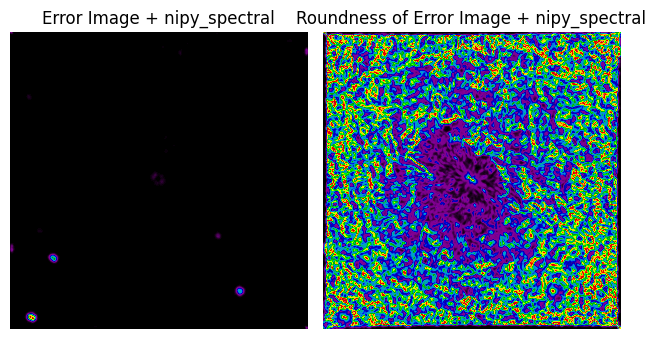

In [161]:
# Subplot Visualization
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap=colormap, origin='lower')
  plt.title(f'Error Image + {colormap}')
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap=colormap, origin='lower')
  plt.title(f'Roundness of Error Image + {colormap}')
  plt.axis('off')

  plt.tight_layout()
  plt.show()

Local Features with multiscale_basic_features

In [162]:
from skimage.feature import multiscale_basic_features

In [163]:
# Generating new featured image with multiscale_basic_features
featured_image = multiscale_basic_features(convolved_grayscale)
print(type(featured_image))
print(featured_image.shape)

<class 'numpy.ndarray'>
(300, 300, 24)


In [164]:
# Splitting and storing channels from P1 to P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

print(P1.shape)
print(P24.shape)

(300, 300)
(300, 300)


In [165]:
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

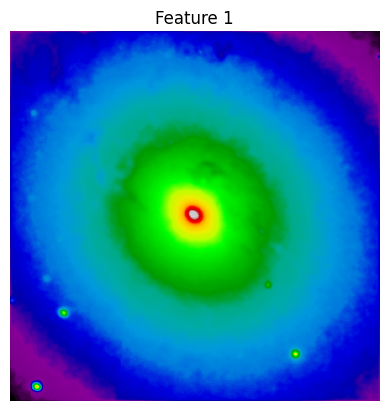

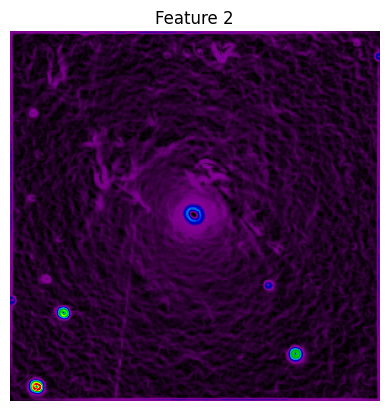

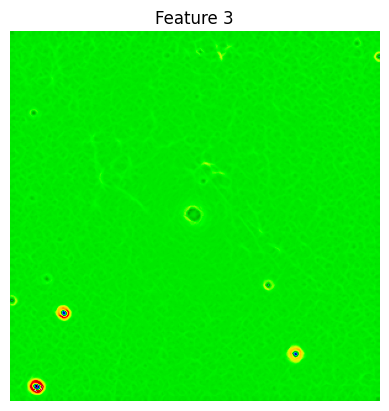

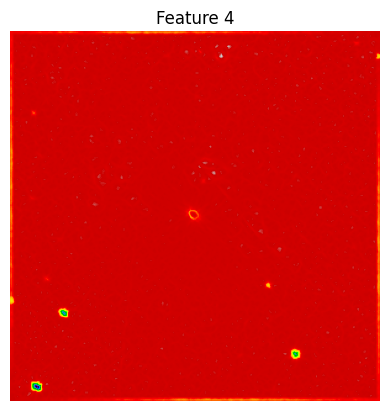

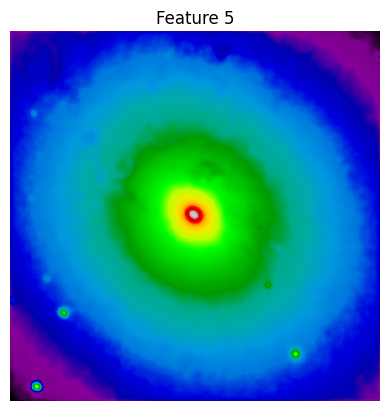

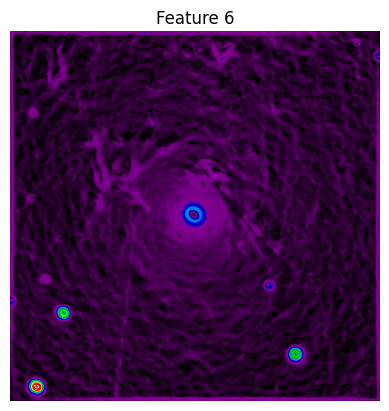

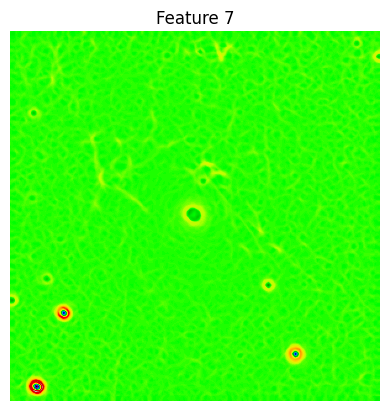

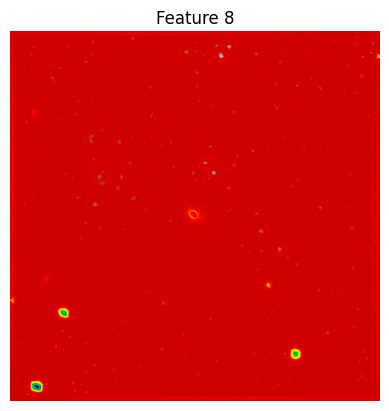

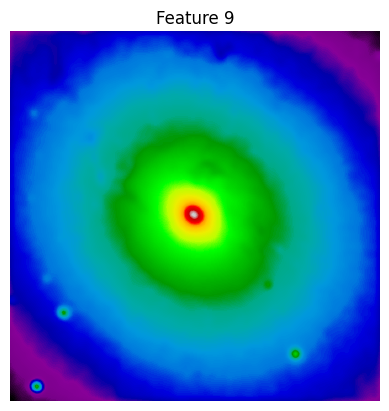

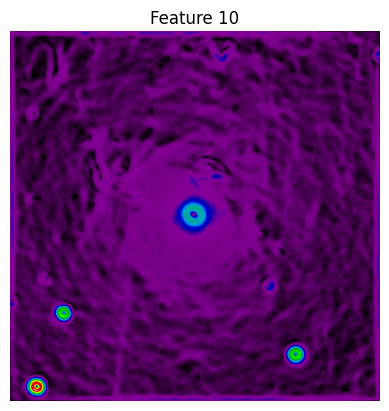

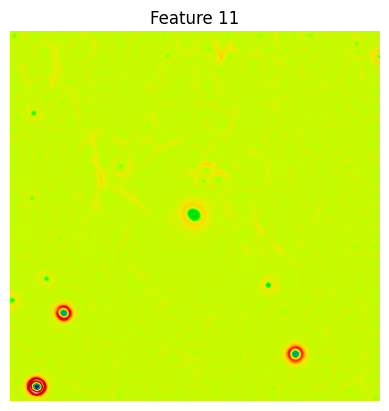

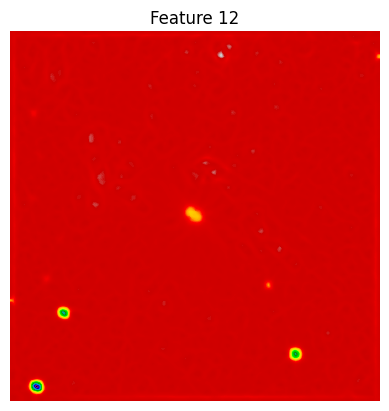

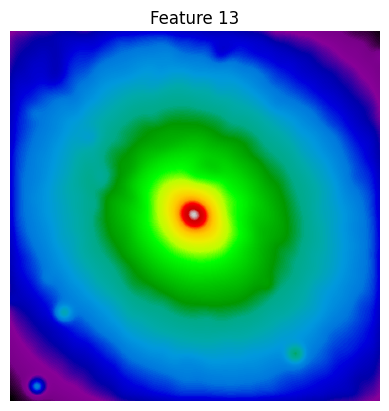

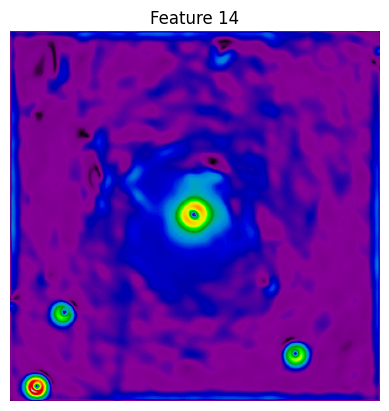

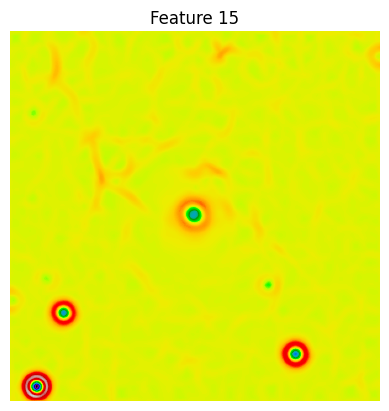

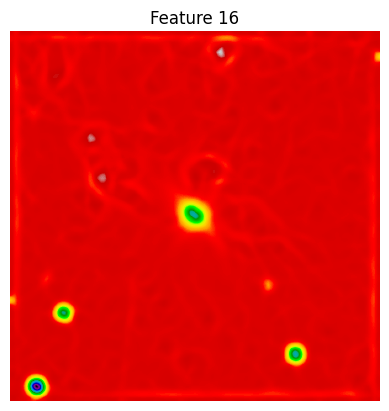

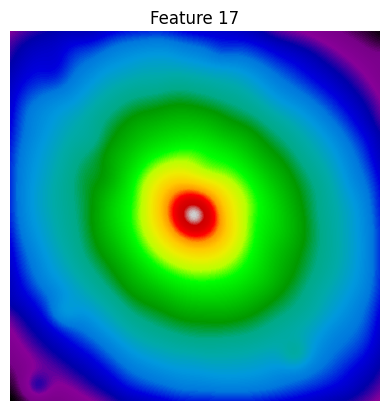

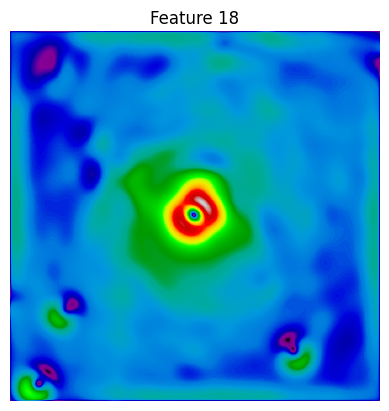

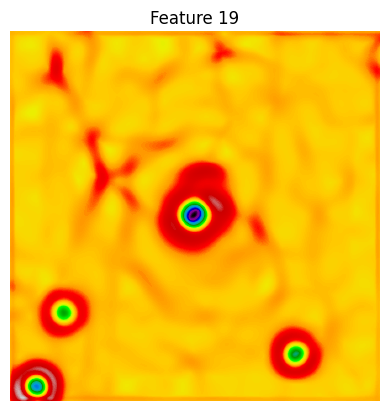

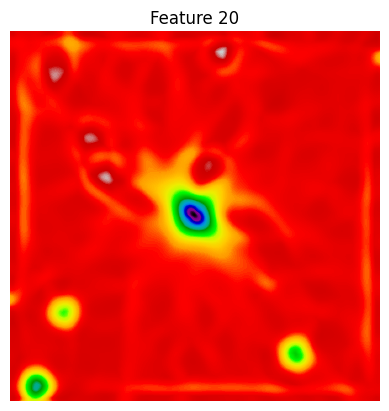

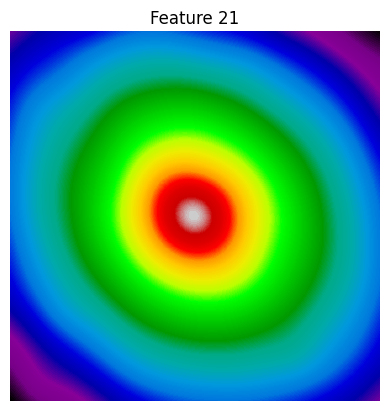

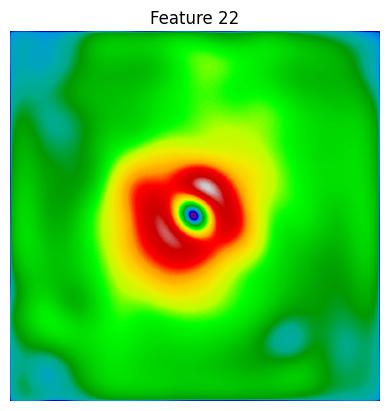

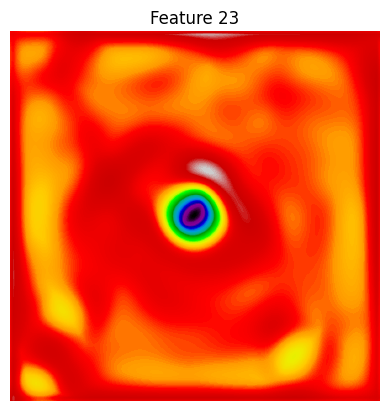

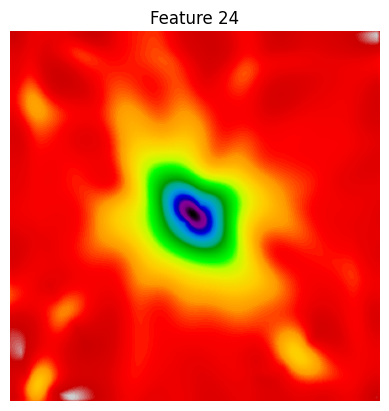

In [166]:
# Visualizing the above channels using prism spectral
for i, feature in enumerate(Pixels):
  plt.imshow(feature, cmap='nipy_spectral', origin='lower')
  plt.title(f'Feature {i+1}')
  plt.axis('off')
  plt.show()